# Task 4. Getting and Clearning Data

done by Malyshev Kyrylo

In [1]:
import pandas as pd
import numpy as np
import pyreadr
from matplotlib import pyplot as plot


You must address the following questions and tasks in your exploratory analysis. For each question/task you will need to make a single bar plot. You can use any plotting system in R to make your plot.

In [2]:
r = pyreadr.read_r('Source_Classification_Code.rds')
SCC = r[None].set_index('SCC')
SCC


,Data.Category,Short.Name,EI.Sector,Option.Group,Option.Set,SCC.Level.One,SCC.Level.Two,SCC.Level.Three,SCC.Level.Four,Map.To,Last.Inventory.Year,Created_Date,Revised_Date,Usage.Notes
SCC,,,,,,,,,,,,,,
10100101,Point,Ext Comb /Electric Gen /Anthracite Coal /Pulve...,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Anthracite Coal,Pulverized Coal,NaN,NaN,,,
10100102,Point,Ext Comb /Electric Gen /Anthracite Coal /Trave...,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Anthracite Coal,Traveling Grate (Overfeed) Stoker,NaN,NaN,,,
10100201,Point,Ext Comb /Electric Gen /Bituminous Coal /Pulve...,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Bituminous/Subbituminous Coal,Pulverized Coal: Wet Bottom (Bituminous Coal),NaN,NaN,,,
10100202,Point,Ext Comb /Electric Gen /Bituminous Coal /Pulve...,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Bituminous/Subbituminous Coal,Pulverized Coal: Dry Bottom (Bituminous Coal),NaN,NaN,,,
10100203,Point,Ext Comb /Electric Gen /Bituminous Coal /Cyclo...,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Bituminous/Subbituminous Coal,Cyclone Furnace (Bituminous Coal),NaN,NaN,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68580001,Point,Misc Chem Proc /Equipment Leaks,Industrial Processes - Chemical Manuf,,,MACT Source Categories,Miscellaneous Processes (Chemicals),Equipment Leaks,Equipment Leaks,68480001.0,2005,,7/27/2008 0:00:00,
68582001,Point,"Misc Chem Proc /Wastewater, Aggregate /Process...",Industrial Processes - Chemical Manuf,,,MACT Source Categories,Miscellaneous Processes (Chemicals),"Wastewater, Aggregate",Process Area Drains,68482001.0,2005,,7/27/2008 0:00:00,
68582002,Point,"Misc Chem Proc /Wastewater, Aggregate /Process...",Industrial Processes - Chemical Manuf,,,MACT Source Categories,Miscellaneous Processes (Chemicals),"Wastewater, Aggregate",Process Equipment Drains,68482002.0,2005,,7/27/2008 0:00:00,


In [3]:
r = pyreadr.read_r('summarySCC_PM25.rds')
NEI = r[None]
NEI


,fips,SCC,Pollutant,Emissions,type,year
rownames,,,,,,
4,09001,10100401,PM25-PRI,15.714000,POINT,1999
8,09001,10100404,PM25-PRI,234.178000,POINT,1999
12,09001,10100501,PM25-PRI,0.128000,POINT,1999
16,09001,10200401,PM25-PRI,2.036000,POINT,1999
20,09001,10200504,PM25-PRI,0.388000,POINT,1999
...,...,...,...,...,...,...
75051181,53009,2265003020,PM25-PRI,0.003152,NON-ROAD,2008
75051191,41057,2260002006,PM25-PRI,0.046870,NON-ROAD,2008
75051201,38015,2270006005,PM25-PRI,1.012890,NON-ROAD,2008


In [4]:
MERGED = pd.merge(NEI, SCC, how='inner', on='SCC')
MERGED


,fips,SCC,Pollutant,Emissions,type,year,Data.Category,Short.Name,EI.Sector,Option.Group,Option.Set,SCC.Level.One,SCC.Level.Two,SCC.Level.Three,SCC.Level.Four,Map.To,Last.Inventory.Year,Created_Date,Revised_Date,Usage.Notes
0,09001,10100401,PM25-PRI,15.714000,POINT,1999,Point,Ext Comb /Electric Gen /Residual Oil /Grade 6 ...,Fuel Comb - Electric Generation - Oil,,,External Combustion Boilers,Electric Generation,Residual Oil,Grade 6 Oil: Normal Firing,NaN,NaN,,,
1,09007,10100401,PM25-PRI,23.217000,POINT,1999,Point,Ext Comb /Electric Gen /Residual Oil /Grade 6 ...,Fuel Comb - Electric Generation - Oil,,,External Combustion Boilers,Electric Generation,Residual Oil,Grade 6 Oil: Normal Firing,NaN,NaN,,,
2,09009,10100401,PM25-PRI,3.058000,POINT,1999,Point,Ext Comb /Electric Gen /Residual Oil /Grade 6 ...,Fuel Comb - Electric Generation - Oil,,,External Combustion Boilers,Electric Generation,Residual Oil,Grade 6 Oil: Normal Firing,NaN,NaN,,,
3,23005,10100401,PM25-PRI,185.737000,POINT,1999,Point,Ext Comb /Electric Gen /Residual Oil /Grade 6 ...,Fuel Comb - Electric Generation - Oil,,,External Combustion Boilers,Electric Generation,Residual Oil,Grade 6 Oil: Normal Firing,NaN,NaN,,,
4,23015,10100401,PM25-PRI,1.287000,POINT,1999,Point,Ext Comb /Electric Gen /Residual Oil /Grade 6 ...,Fuel Comb - Electric Generation - Oil,,,External Combustion Boilers,Electric Generation,Residual Oil,Grade 6 Oil: Normal Firing,NaN,NaN,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6497646,32003,2401085000,PM25-PRI,0.000000,NONPOINT,2008,Nonpoint,Surface Coating /Railroad /Total: All Solvent ...,Solvent - Industrial Surface Coating & Solvent...,,,Solvent Utilization,Surface Coating,Railroad: SIC 374,Total: All Solvent Types,NaN,NaN,,,
6497647,32003,2415045000,PM25-PRI,0.000000,NONPOINT,2008,Nonpoint,Degreasing /Misc Manufacturing: All Processes ...,Solvent - Degreasing,,,Solvent Utilization,Degreasing,Miscellaneous Manufacturing (SIC 39): All Proc...,Total: All Solvent Types,NaN,NaN,,,
6497648,06067,2520010000,PM25-PRI,0.030311,NONPOINT,2008,Nonpoint,Inorganic Chemical Storage /Commercial/Industr...,Industrial Processes - Storage and Transfer,,,Storage and Transport,Inorganic Chemical Storage,Commercial/Industrial: Breathing Loss,Total: All Products,NaN,NaN,,,
6497649,21111,2510000000,PM25-PRI,0.000000,NONPOINT,2008,Nonpoint,Organic Chemical Storage /All Storage Types: B...,Industrial Processes - Storage and Transfer,,,Storage and Transport,Organic Chemical Storage,All Storage Types: Breathing Loss,Total: All Products,NaN,NaN,,,


### 1. Have total emissions from PM2.5 decreased in the United States from 1999 to 2008? Make a plot showing the total PM2.5 emission from all sources for each of the years 1999, 2002, 2005, and 2008.

<AxesSubplot: xlabel='year'>

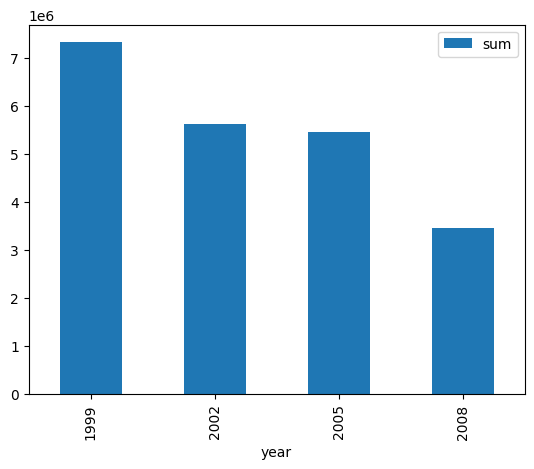

In [5]:
NEI \
    .groupby('year')['Emissions'] \
    .agg(sum=sum) \
    .plot(kind='bar')


### 2. Have total emissions from PM2.5 decreased in the Baltimore City, Maryland (fips == "24510") from 1999 to 2008?

<AxesSubplot: xlabel='year'>

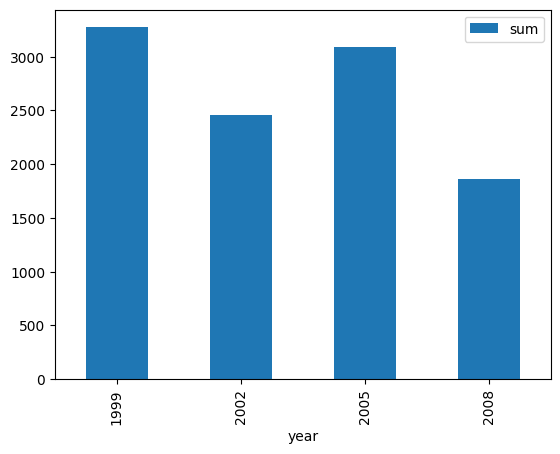

In [6]:
NEI[NEI['fips'] == '24510'] \
    .groupby('year')['Emissions'] \
    .agg(sum=sum) \
    .plot(kind='bar')


### 3. Of the four types of sources indicated by the type (point, nonpoint, onroad, nonroad) variable, which of these four sources have seen decreases in emissions from 1999–2008 for Baltimore City? Which have seen increases in emissions from 1999–2008?

<AxesSubplot: xlabel='year'>

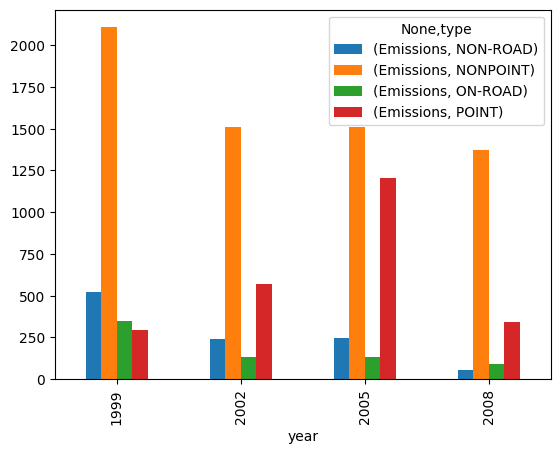

In [7]:
NEI[(NEI['fips'] == '24510')].pivot_table(
    index='year',
    columns=['type'],
    values=['Emissions'],
    aggfunc=sum
).plot(kind='bar')


### 4. Across the United States, how have emissions from coal combustion-related sources changed from 1999–2008?

<AxesSubplot: xlabel='year'>

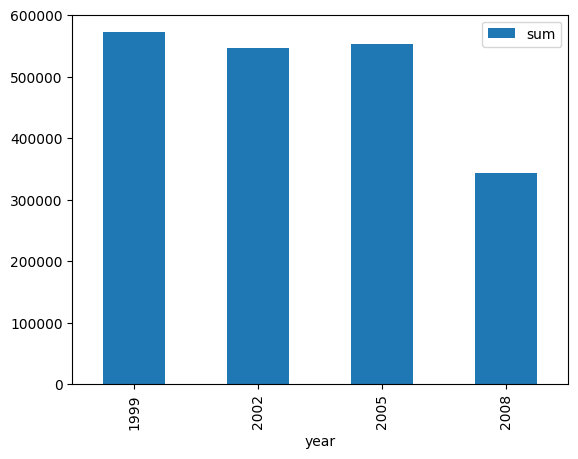

In [8]:
MERGED[MERGED['EI.Sector'].str.contains('Coal')] \
    .groupby('year')['Emissions'] \
    .agg(sum=sum) \
    .plot(kind='bar')


### 5. How have emissions from motor vehicle sources changed from 1999–2008 in Baltimore City (EI.Sector starts from “Mobile”)?

<AxesSubplot: xlabel='year'>

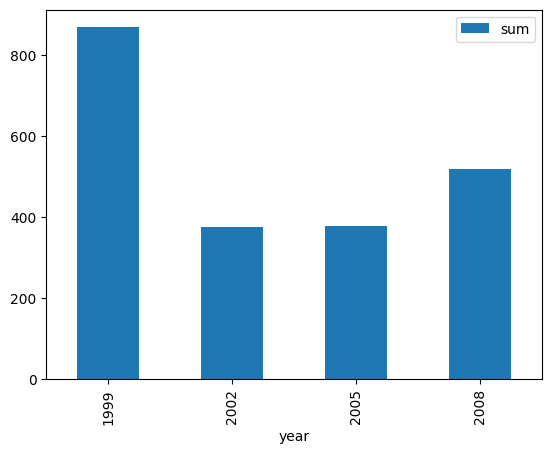

In [9]:
MERGED[((MERGED['fips'] == '24510')) & (MERGED['EI.Sector'].str.startswith('Mobile'))] \
    .groupby('year')['Emissions'] \
    .agg(sum=sum) \
    .plot(kind='bar')


### 6. Compare emissions from motor vehicle sources in Baltimore City with emissions from motor vehicle sources in Los Angeles County, California (fips == "06037"). Which city has seen greater changes over time in motor vehicle emissions?

<AxesSubplot: xlabel='year'>

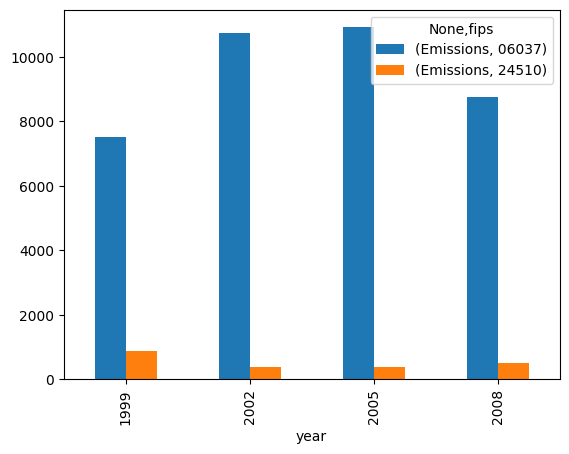

In [10]:
MERGED[(MERGED['fips'].isin(['24510', '06037'])) & (MERGED['EI.Sector'].str.startswith('Mobile'))] \
    .pivot_table(
        index='year',
        columns=['fips'],
        values=['Emissions'],
        aggfunc=sum
).plot(kind='bar')
